# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1619538268223_0006,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

In [2]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/46/231de802ade4225b76b96cffe419cf3ce52bbe92e3b092cf12db7d11c207/kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl

In [3]:
sc.install_pypi_package("seaborn==0.11.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/68/ad/6c2406ae175f59ec616714e408979b674fe27b9587f79d59a528ddfbcd5b/seaborn-0.11.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7d/e8/43ffca541d2f208d516296950b25fe1084b35c2881f4d444c1346ca75815/scipy-1.6.3-cp37-cp37m-manylinux1_x86_64.whl

In [4]:
sc.install_pypi_package("bokeh==2.3.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/60/7a/e881b5abb54db0e6e671ab088d079c57ce54e8a01a3ca443f561ccadb37e/typing_extensions-3.7.4.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bf/fa/2befee379094720b54065daa9c6117f3edb7d35f86cde0f50b3a28ecfadf/tornado-6.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/33/34/542152297dcc6c47a9dcb0685eac6d652d878ed3cea83bf2b23cb988e857/Pillow-8.2.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3e/89/7ea760b4daa42653ece2380531c90f64788d979110a2ab51049d92f408af/packaging-20.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/c2/1eece8c95ddbc9b1aeb64f5783a9e07a286de42191b7204d67b7496ddf35/Jinja2-2.11.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/98/7b/ff284bd8c80654e471b769062a9b43cc5d03e7a615048d96f4619df8d420/MarkupSafe-1.1.1-cp37-cp37m-manylinux1_x86_64.whl

In [5]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
bokeh                      2.3.1    
boto                       2.49.0   
click                      7.1.2    
cycler                     0.10.0   
Jinja2                     2.11.3   
jmespath                   0.10.0   
joblib                     0.16.0   
kiwisolver                 1.3.1    
lxml                       4.5.2    
MarkupSafe                 1.1.1    
matplotlib                 3.2.1    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
packaging                  20.9     
pandas                     1.0.3    
Pillow                     8.2.0    
pip                        9.0.1    
py-dateutil                2.2      
pyparsing                  2.4.7    
python-dateutil            2.8.1    
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
P

## Importing

Now, import the installed packages from the previous block below.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [7]:
business_data= spark.read.json('s3://yelp-spark-dataset/yelp_academic_dataset_business.json')
review_data=spark.read.json('s3://yelp-spark-dataset/yelp_academic_dataset_review.json')
user_data=spark.read.json('s3://yelp-spark-dataset/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data

Display the number of rows and columns in our dataset.

In [8]:
print('Yelp Business Data Set | Rows: '+ str(business_data.count())+' | Columns:'+ str(len(business_data.columns)))
print('Yelp Review Data Set | Rows: '+ str(review_data.count())+ ' | Columns:'+ str(len(review_data.columns)))
print('Yelp User Data Set | Rows: '+ str(user_data.count())+' | Columns:'+ str(len(user_data.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Yelp Business Data Set | Rows: 160585 | Columns:14
Yelp Review Data Set | Rows: 8635403 | Columns:9
Yelp User Data Set | Rows: 2189457 | Columns:22

Display the DataFrame schema below.

In [9]:
business_data.printSchema()
review_data.printSchema()
user_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [10]:
business_data.select("business_id","name","city","state","stars","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [11]:
from pyspark.sql.functions import explode, split, trim
business_data_exploded=business_data.select("business_id","categories")
business_data_exploded = business_data_exploded.withColumn('categories',explode(split('categories',",")))
business_data_exploded = business_data_exploded.withColumn('categories', trim(business_data_exploded.categories))

#business_data_exploded.columns = business_data_exploded.columns.strip()
business_data_exploded.count()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

708968

Display the first 5 rows of your association table below.

In [12]:
business_data_exploded.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|  categories|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [13]:
business_data_exploded.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1330

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [14]:
business_data_exploded.groupby('categories').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|      Dermatologists|  351|
|      Paddleboarding|   67|
|        Aerial Tours|    8|
|         Hobby Shops|  610|
|          Bubble Tea|  779|
|             Embassy|    9|
|             Tanning|  701|
|            Handyman|  507|
|      Aerial Fitness|   13|
|             Falafel|  141|
|        Summer Camps|  308|
|       Outlet Stores|  184|
|     Clothing Rental|   37|
|      Sporting Goods| 1864|
|     Cooking Schools|  114|
|  College Counseling|   20|
|  Lactation Services|   47|
|Ski & Snowboard S...|   55|
|             Museums|  336|
|              Doulas|   52|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [15]:
count_business=business_data_exploded.groupby('categories').count().orderBy('count',ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
barchart= count_business.toPandas()
barchart=barchart.head(21)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

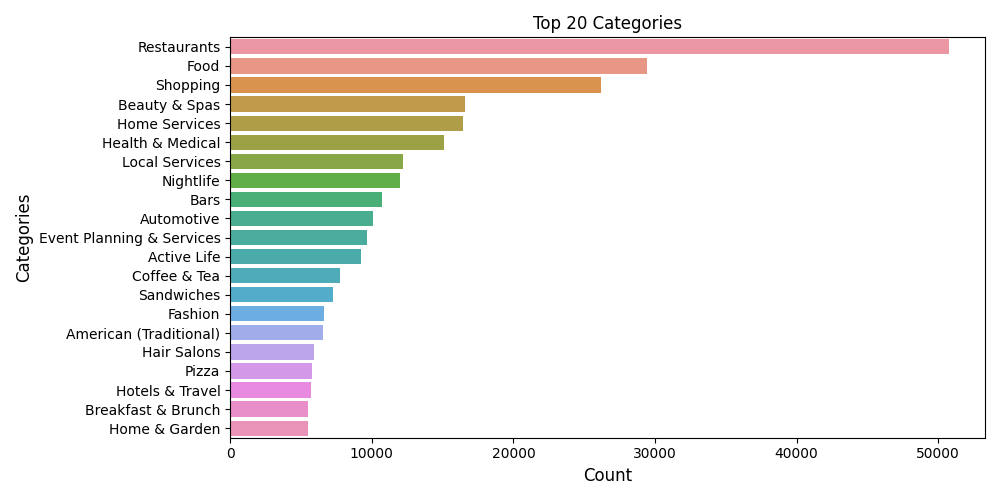

In [17]:
plt.figure(figsize=(10,5))
barchart_viz= sns.barplot(x='count',y='categories',data=barchart)
barchart_viz.set_title('Top 20 Categories')
barchart_viz.set_xlabel( "Count" , size = 12 )
barchart_viz.set_ylabel( "Categories" , size = 12 )
plt.tight_layout()
#plt.show()
%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [18]:
review_data.printSchema()
review_data.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

8635403

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [19]:
star_data=review_data.select("business_id","stars")
star_data.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [20]:
avg_review_data=star_data.groupby('business_id').mean()
avg_review_data.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|uEUweopM30lHcVxjO...|               3.0|
|wdBrDCbZopowEkIEX...| 4.538461538461538|
|L3WCfeVozu5etMhz4...|               4.2|
|bOnsvrz1VkbrZM1jV...|               3.8|
|R0IJhEI-zSJpYT1YN...| 3.606060606060606|
|XzXcpPCb8Y5huklEN...| 4.666666666666667|
|yHtuNAlYKtRZniO8O...| 4.714285714285714|
|O_BAT_rvszHYBNEM6...|              2.45|
|E8Fl7qE_y-bhRbkkd...| 4.666666666666667|
|MPzc6QuEjwk3E3jVT...|            3.3125|
|dXhuCvyz5nnaboNzp...| 4.392857142857143|
|deTlQzwpIRfgmAuDa...|3.7604790419161676|
|VmujhV_mpJh1TW3Cx...|2.7884615384615383|
|bzny-7M_JjYHsKuoC...| 4.648648648648648|
|BnfkEAmvnUyIEUvG3...| 3.979591836734694|
|jZBhw30QecAQNDtpM...|               5.0|
|tI_czdTHfsy1ndBwt...| 4.428571428571429|
|4T6yFKDishcRS5k9p...| 4.333333333333333|
|nM6X2lQp5kiVteXBM...| 3.909090909090909|
|ERI2yvYf9QEN_fFOK...|2.2718446601941746|
+--------------------+------------

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [21]:
bus_data= business_data.select("business_id","name","city","state","stars")
avg_data= avg_review_data.select("business_id","avg(stars)")
all_stars_data = bus_data.join(avg_data, bus_data.business_id == avg_data.business_id).drop(bus_data.business_id)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [22]:
new_stars_skew=all_stars_data.select("avg(stars)","stars","name","city","state")
new_stars_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+----------+-----+
|        avg(stars)|stars|                name|      city|state|
+------------------+-----+--------------------+----------+-----+
|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|
|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|
|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|
|               5.0|  5.0|          WonderWell|    Austin|   TX|
|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|
+------------------+-----+--------------------+----------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [23]:
new_stars_skew=new_stars_skew.withColumn('skew',
                                        ((new_stars_skew['avg(stars)']-new_stars_skew['stars'])/new_stars_skew['stars']))
new_stars_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+----------+-----+--------------------+
|        avg(stars)|stars|                name|      city|state|                skew|
+------------------+-----+--------------------+----------+-----+--------------------+
|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|                 0.0|
|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|            -0.03125|
|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|-0.03333333333333...|
|               5.0|  5.0|          WonderWell|    Austin|   TX|                 0.0|
|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|-0.03571428571428571|
+------------------+-----+--------------------+----------+-----+--------------------+
only showing top 5 rows

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

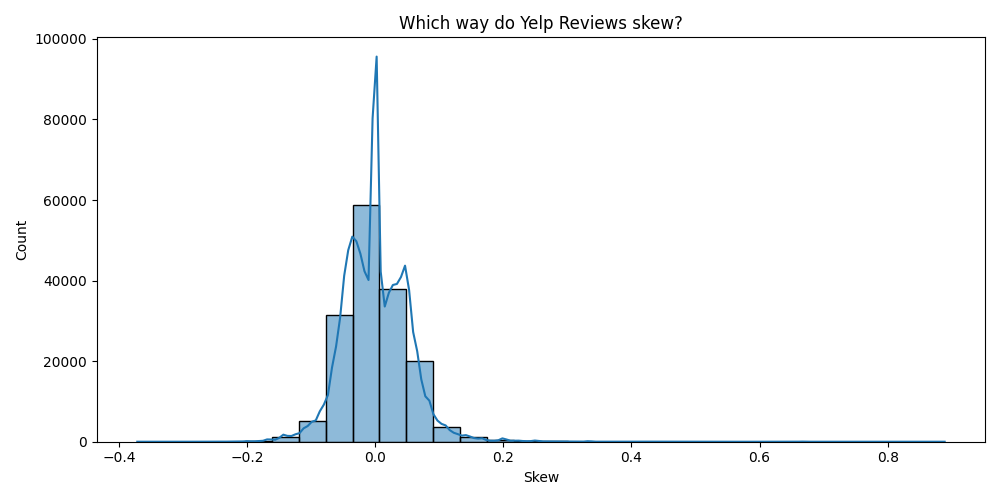

In [24]:
new_histplot= new_stars_skew.toPandas()
#new_histplot.head()
plt.figure(figsize=(10,5))
skew_histogram= sns.histplot(data=new_histplot, x='skew',bins=30,kde=True)
skew_histogram.set_title('Which way do Yelp Reviews skew?')
skew_histogram.set_xlabel( "Skew" , size = 10 )
skew_histogram.set_ylabel( "Count" , size = 10 )
plt.tight_layout()
plt.show()
%matplot plt

In [25]:
print (new_histplot.skew())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

avg(stars)   -0.563063
stars        -0.541505
skew          0.874749
dtype: float64

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

In [ ]:
#The Yelp (written) Review are skewing positively. This shows there is a balance of both positive and negative. 
#Therefore it would probably give everyone who uses Yelp a balanced view of different business.

# Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [26]:
user_data.printSchema()
user_data.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

2189457

In [27]:
review_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [28]:
df_user_data=user_data.select("user_id","average_stars","review_count")
df_review_data=review_data.select("user_id","business_id","stars")
df_stars_data = df_user_data.join(df_review_data, df_user_data.user_id == df_review_data.user_id).drop(df_review_data.user_id)
df_stars_data.show(5)
df_stars_data.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+------------+--------------------+-----+
|             user_id|average_stars|review_count|         business_id|stars|
+--------------------+-------------+------------+--------------------+-----+
|--1UpCuUDJQbqiuFX...|         2.62|          12|GgR7kcKykuqXB11fW...|  5.0|
|--3Bk72HakneTyp3D...|         3.67|          11|rxNfidGLHtMYyLNeo...|  5.0|
|--3Hl2oAvTPlq-f7K...|         2.73|          11|2OaX6XjAoI7VD6jLd...|  2.0|
|--3Hl2oAvTPlq-f7K...|         2.73|          11|IfOj3AxPl3Exsd_Yl...|  1.0|
|--3Hl2oAvTPlq-f7K...|         2.73|          11|bAuYOa-VuqTOnKzWN...|  2.0|
+--------------------+-------------+------------+--------------------+-----+
only showing top 5 rows

8635403

In [29]:
all_stars_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- business_id: string (nullable = true)
 |-- avg(stars): double (nullable = true)

In [30]:
elite_review_data=df_stars_data.select('business_id',"average_stars")
elite_review_data=elite_review_data.groupby('business_id').mean()
elite_review_data.show()
elite_review_data.count()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|avg(average_stars)|
+--------------------+------------------+
|SEHexDtZaL3Gv81aE...| 3.378604651162792|
|B9LGNspzZYVRs5Sl8...|3.8768181818181815|
|XVZDMELcUCdyWjbEz...|2.8222857142857145|
|6KGBXOeSJYf9ePdyA...|3.7497374429223744|
|xm4QAhRiwd6Urq6ku...|           4.02675|
|quL0Dqop3Ni5qcwd2...|3.6404109589041096|
|2boQDeHxopolPtJhV...| 3.749166666666667|
|8e3_PgOlFLeAys6X-...| 3.881111111111111|
|08n38tS38iznDwL_X...| 3.939647887323944|
|g8sJbkPtA78h0yNQQ...|              3.94|
|x_LapuF4Zkn5lySuA...|3.2118750000000005|
|kUV8r9IQ5l09XMyjW...|2.8674999999999997|
|6qlWc-OVhTQfcyVi3...| 4.288823529411765|
|dcAzi-fNs05qLl3lw...|3.3847272727272717|
|EvYWMhT0o9M_9NaaI...|3.1781249999999996|
|BnBnPjmUeUaMAnbJH...| 3.472857142857142|
|boF5lsuImrqbuDkuF...| 3.596279069767443|
|TMxgR8YnOI-0HxrTg...|             3.623|
|UK5t99N509A12UjUn...| 3.735933333333333|
|ESntdVKBhAdDqERly...|3.7782352941176462|
+--------------------+------------

In [31]:
ddf = elite_review_data.join(all_stars_data, all_stars_data. business_id == elite_review_data. business_id).drop(all_stars_data. business_id)
ddf.show(5)
ddf.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+--------------------+----------+-----+-----+--------------------+------------------+
|avg(average_stars)|                name|      city|state|stars|         business_id|        avg(stars)|
+------------------+--------------------+----------+-----+-----+--------------------+------------------+
|3.8949999999999996|    CheraBella Salon|   Peabody|   MA|  5.0|--JuLhLvq3gyjNnXT...|               5.0|
|             4.085|Mezcal Cantina & ...|  Columbus|   OH|  4.0|--_nBudPOb1lNRgKf...|             3.875|
|3.6570000000000005|    Red Table Coffee|    Austin|   TX|  4.0|--kyOk0waSrCDlbSv...|3.8666666666666667|
| 4.410714285714286|          WonderWell|    Austin|   TX|  5.0|--z9usx6Fin8P_f0v...|               5.0|
|3.8206249999999997|         Avalon Oaks|Wilmington|   MA|  3.5|-0qeY1293steyCqYh...|             3.375|
+------------------+--------------------+----------+-----+-----+--------------------+------------------+
only showing top 5 rows

160585

In [33]:
df_correlation=ddf.select("business_id","avg(stars)","avg(average_stars)")
df_correlation.show(2)
df_correlation.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+------------------+
|         business_id|avg(stars)|avg(average_stars)|
+--------------------+----------+------------------+
|--JuLhLvq3gyjNnXT...|       5.0|             3.895|
|--_nBudPOb1lNRgKf...|     3.875|             4.085|
+--------------------+----------+------------------+
only showing top 2 rows

160585

In [43]:
new_scatplot= df_correlation.toPandas()
new_scatplot=new_scatplot.drop_duplicates()
new_scatplot

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   business_id  avg(stars)  avg(average_stars)
0       --JuLhLvq3gyjNnXT9Q95w    5.000000            3.895000
1       --_nBudPOb1lNRgKfjLtrw    3.875000            4.085000
2       --kyOk0waSrCDlbSvYtAOw    3.866667            3.657000
3       --z9usx6Fin8P_f0vc7DGQ    5.000000            4.410714
4       -0qeY1293steyCqYhqckMA    3.375000            3.820625
...                        ...         ...                 ...
160580  zptEZZLh0iP5PnslDAUbkw    3.092105            3.608289
160581  zvaKvoKVDpgTtKK6Mc1SKw    4.215909            3.828750
160582  zwOz6JjjQ0leNlKWhr5Shw    4.789474            4.196842
160583  zwT7rrAMgEMA9q8twm7DGg    5.000000            4.540000
160584  zzgP0DV4OZfXkPdGNvtANQ    4.200000            4.142000

[160585 rows x 3 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

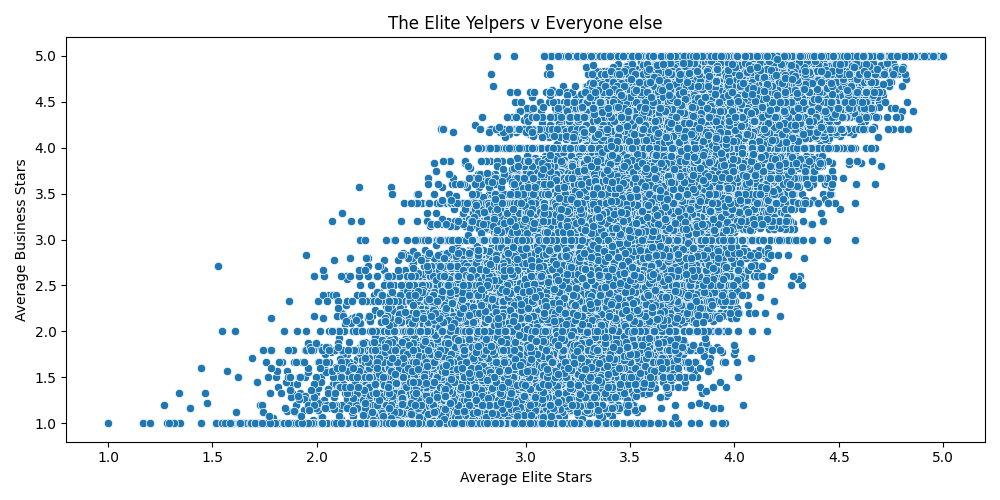

In [37]:
plt.figure(figsize=(10,5))
scattter_plot= sns.scatterplot(data=new_scatplot, x="avg(average_stars)", y="avg(stars)")
scattter_plot.set_title('The Elite Yelpers v Everyone else')
scattter_plot.set_xlabel( "Average Elite Stars" , size = 10 )
scattter_plot.set_ylabel( "Average Business Stars" , size = 10 )
plt.tight_layout()
plt.show()
%matplot plt

In [45]:
correlation = new_scatplot['avg(stars)']. corr(new_scatplot['avg(average_stars)'])
print ('The following is the correlation between Elite Avg Star and Average Stars:', correlation)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The following is the correlation between Elite Avg Star and Average Stars: 0.8095213594120078

In [ ]:
# Although the graph is too cluttered to make an accurate read of the correlation between both type of review. 
#Using the correlation calculation, there is a strong postitive correlation between both showing that it seems that a Elite Yelper 
#do make a difference in the average rating of a business 
